In [ ]:
###Traveling Salesman Algorithm
##Die Städte: Istanbul, Ankara, Konya, Rize, Giresun, Tekirdağ, Muğla, Hatay
##Darstellung: [I, A, K, R, G, T, M, H]
##Distanz: [Städte X Städte]
##n ist die Anzahl der Städte
##Init Parents
import random
import matplotlib.pyplot as plt
stadte = ['I','A','K','R','G','T','M','H']
distanz = [[0,450,704,1141,933,146,671,1095],
          [450,0,262,813,606,600,619,653],
          [704,262,0,957,784,856,509,513],
          [1141,813,957,0,208,1291,1440,973],
          [933,606,784,208,0,1083,1232,813],
          [146,600,856,1291,1083,0,581,1263],
          [671,619,509,1440,1232,581,0,1044],
          [1095,653,513,973,813,1263,1044,0]]
p1 = ['I','A','K','R','G','T','M','H']
p2 = ['I','A','K','R','G','T','M','H']
n = len(p1)
random.shuffle(p1)
random.shuffle(p2)
population = [p1,p2]
print(population)

[['A', 'K', 'G', 'T', 'R', 'I', 'H', 'M'], ['T', 'M', 'G', 'R', 'A', 'K', 'I', 'H']]


In [ ]:
def fitness_func(element):
    kost = 0
    for i in range(n-1):
        kost = kost + distanz[stadte.index(element[i])][stadte.index(element[i+1])]
    return kost

def crossover(par1,par2,schnitt):
    print("Schnittwert: " + str(schnitt))
    child1 = []
    child2 = []
    child1.extend(par1[:schnitt])
    child1.extend(par2[schnitt:])
    child2.extend(par2[:schnitt])
    child2.extend(par1[schnitt:])
    return child1, child2

In [ ]:
def run(iteration):
    kost_list = []
    erfolgreich = 0
    aes = []
    for j in range(iteration):
        aes_lauf = 0
        p1 = random.choice(population)
        p2 = random.choice(population)
        kost_p1 = fitness_func(p1)
        kost_p2 = fitness_func(p2)
        aktuel_kost = min(kost_p1,kost_p2)

        c1, c2 = crossover(p1,p2,random.randint(0,n))

        if((fitness_func(c1)<aktuel_kost) and (fitness_func(c2)<aktuel_kost)):
            aes_lauf = 2
            population.append(c1)
            population.append(c2)
        elif (fitness_func(c1)<aktuel_kost):
            aes_lauf = 1
            population.append(c1)
        elif (fitness_func(c2)<aktuel_kost):
            aes_lauf = 1
            population.append(c2)
        print("Iteration: " + str(j))
        print("Kosten: " + str(aktuel_kost))
        print("Populationgrösse: " + str(len(population)))
        print("-----")
        kost_list.append(aktuel_kost)
        final_population = len(population)
        erfolgreich += aes_lauf
        aes.append(aes_lauf)
    return erfolgreich, aes, kost_list
    

Schnittwert: 4
Iteration: 0
Kosten: 4895
Populationgrösse: 3
-----
Schnittwert: 1
Iteration: 1
Kosten: 4790
Populationgrösse: 3
-----
Schnittwert: 4
Iteration: 2
Kosten: 4790
Populationgrösse: 3
-----
Schnittwert: 5
Iteration: 3
Kosten: 4895
Populationgrösse: 3
-----
Schnittwert: 8
Iteration: 4
Kosten: 4895
Populationgrösse: 3
-----
Schnittwert: 3
Iteration: 5
Kosten: 4790
Populationgrösse: 3
-----
Schnittwert: 7
Iteration: 6
Kosten: 4895
Populationgrösse: 4
-----
Schnittwert: 4
Iteration: 7
Kosten: 4471
Populationgrösse: 5
-----
Schnittwert: 3
Iteration: 8
Kosten: 4471
Populationgrösse: 6
-----
Schnittwert: 0
Iteration: 9
Kosten: 3704
Populationgrösse: 6
-----
Schnittwert: 1
Iteration: 10
Kosten: 3704
Populationgrösse: 6
-----
Schnittwert: 7
Iteration: 11
Kosten: 4366
Populationgrösse: 6
-----
Schnittwert: 0
Iteration: 12
Kosten: 3704
Populationgrösse: 6
-----
Schnittwert: 2
Iteration: 13
Kosten: 4366
Populationgrösse: 7
-----
Schnittwert: 3
Iteration: 14
Kosten: 3704
Populationgrösse

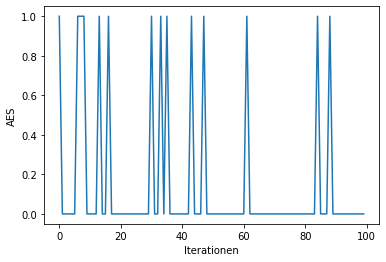

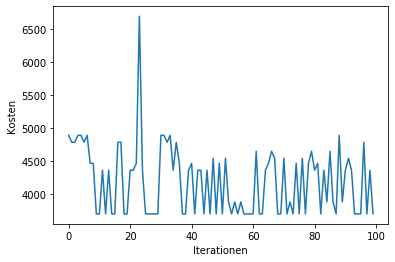

SR:0.14


In [ ]:
iteration = 100
erfolgreich, aes, kosten = run(iteration)
plt.plot(aes)
plt.ylabel('AES')
plt.xlabel('Iterationen')
plt.show()

plt.plot(kosten)
plt.ylabel('Kosten')
plt.xlabel('Iterationen')
plt.show()

print("SR:"+ str(erfolgreich/iteration))